In [2]:
# organize imports
from __future__ import print_function

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import os
import gc
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
config={
  "model"           : "inceptionv3",
  "weights"         : "imagenet",
  "include_top"     : False,
  "features_path"   : "../input/output/IOdev/inceptionv3/features.h5",
  "labels_path"     : "../input/output/IOdev/inceptionv3/labels.h5",
  "results"         : "output/IOdev/inceptionv3/results.txt",
  "classifier_path" : "output/IOdev/inceptionv3/classifier.pickle",
  "model_path"      : "../input/output/IOdev/inceptionv3/model",

  "test_size"       : 0.15,
  "seed"            : 9,
  "num_classes"     : 14
}

In [4]:
# config variables
test_size     = config["test_size"]
seed      = config["seed"]
features_path   = config["features_path"]
labels_path   = config["labels_path"]
results     = config["results"]
classifier_path = config["classifier_path"]
train_path    = ['Effusion', 'Atelectasis', 'Edema', 'Hernia', 'Mass', 'Nodule', 'Fibrosis', 'Emphysema', 'Cardiomegaly', 'Consolidation', 'Infiltration', 'Pneumonia', 'Pneumothorax', 'Pleural_Thickening']
num_classes   = config["num_classes"]
classifier_path = config["classifier_path"]

In [5]:
# import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [6]:
del features_string,labels_string,h5f_data,h5f_label
gc.collect()
# verify the shape of features and labels
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))


[INFO] features shape: (8881, 131072)
[INFO] labels shape: (8881,)


In [7]:
print ("[INFO] training started...")
# split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (7548, 131072)
[INFO] test data   : (1333, 131072)
[INFO] train labels: (7548,)
[INFO] test labels : (1333,)


In [7]:
del features,labels
gc.collect()

0

In [8]:
# use logistic regression as the model
print ("[INFO] creating model...")
SGD = SGDClassifier(random_state=seed,verbose=1)
SGD.fit(trainData, trainLabels)

[INFO] creating model...


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


-- Epoch 1
Norm: 5657.56, NNZs: 131072, Bias: -12.443821, T: 7548, Avg. loss: 7942.834771
Total training time: 2.42 seconds.
-- Epoch 2
Norm: 4163.69, NNZs: 131072, Bias: -9.664269, T: 15096, Avg. loss: 1535.563481
Total training time: 4.69 seconds.
-- Epoch 3
Norm: 3341.00, NNZs: 131072, Bias: -9.368155, T: 22644, Avg. loss: 606.076538
Total training time: 6.93 seconds.
-- Epoch 4
Norm: 2857.40, NNZs: 131072, Bias: -8.992934, T: 30192, Avg. loss: 276.955454
Total training time: 9.16 seconds.
-- Epoch 5
Norm: 2510.03, NNZs: 131072, Bias: -8.989158, T: 37740, Avg. loss: 178.519359
Total training time: 11.37 seconds.
-- Epoch 1
Norm: 5861.85, NNZs: 131072, Bias: -15.092058, T: 7548, Avg. loss: 9677.652677
Total training time: 2.28 seconds.
-- Epoch 2
Norm: 4393.68, NNZs: 131072, Bias: -14.667809, T: 15096, Avg. loss: 1761.737447
Total training time: 4.49 seconds.
-- Epoch 3
Norm: 3609.02, NNZs: 131072, Bias: -15.464712, T: 22644, Avg. loss: 740.241987
Total training time: 6.68 seconds.
-

Norm: 4396.76, NNZs: 131072, Bias: -18.254636, T: 15096, Avg. loss: 1693.768162
Total training time: 4.67 seconds.
-- Epoch 3
Norm: 3625.88, NNZs: 131072, Bias: -19.313497, T: 22644, Avg. loss: 714.436725
Total training time: 6.86 seconds.
-- Epoch 4
Norm: 3118.47, NNZs: 131072, Bias: -19.069493, T: 30192, Avg. loss: 373.494992
Total training time: 9.01 seconds.
-- Epoch 5
Norm: 2701.08, NNZs: 131072, Bias: -19.729956, T: 37740, Avg. loss: 194.958120
Total training time: 11.13 seconds.


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  2.6min finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=1, penalty='l2',
       power_t=0.5, random_state=9, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
print ("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


In [9]:
# use logistic regression as the model
print ("[INFO] creating model...")
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# model = SGDClassifier(random_state=seed)
gnb.fit(trainData, trainLabels)

[INFO] creating model...


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn.svm import LinearSVC
SVC = LinearSVC(random_state=seed)
SVC.fit(trainData, trainLabels)

In [1]:
os.mkdir("output")
os.mkdir("output/IOdev")
os.mkdir("output/IOdev/inceptionv3/")

NameError: name 'os' is not defined

In [28]:
# use rank-1 and rank-5 predictions
print ("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0
rank_5 = 0

[INFO] evaluating model...


In [40]:
# evaluate the model of test data
preds_gnb = gnb.predict(testData)
preds_sgd = SGD.predict(testData)

In [32]:
# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

In [41]:
print(testLabels,preds)

[12  0  4 ...  6 10 13] [ 2 13  4 ...  6  6  6]


In [ ]:
# dump classifier to file
print ("[INFO] saving model...")
pickle.dump(model, open(classifier_path, 'wb'))


[INFO] confusion matrix


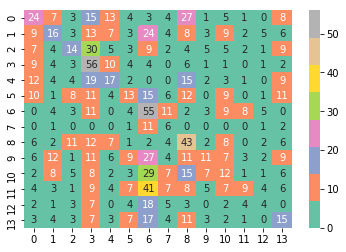

In [42]:
#  display the confusion matrix
print ("[INFO] confusion matrix")

# get the list of training lables
labels = sorted(list(train_path))

# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [43]:
total=len(testLabels.tolist())
print(total)
counter=0
for i in range(len(testLabels)):
    if testLabels[i]==preds[i]:
        counter+=1
print("accuracy is ",((counter/total)*100))

1333
accuracy is  22.13053263315829
